In [3]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/project/ssverma_shared/projects/Endometriosis/Endo_Subtyping_Heterogeneity/Cluster_Training/')

In [4]:
! snakemake -n Pheno/FULL_PMBB_all_cleaned_phenos.csv

Building DAG of jobs...
Nothing to be done (all requested files are present and up to date).


In [5]:
output_data='Data/non_genotyped_PMBB_data_for_no_snps_clustering.csv'
input_PMBB_cov='Pheno/FULL_PMBB_pheno_covars.csv'
input_PMBB_pheno='Pheno/FULL_PMBB_all_cleaned_phenos.csv'
input_geno_fam='/project/PMBB/PMBB-Release-2020-2.0/Genotype/PMBB-Release-2020-2.0_genetic_genotype.fam'
input_imp_fam='/project/PMBB/PMBB-Release-2020-2.0/Imputed/pgen/PMBB-Release-2020-2.0_genetic_imputed-topmed-r2_chr22.psam'

In [6]:
covDF = pd.read_csv(input_PMBB_cov,index_col='PMBB_ID')
covDF

,endometriosis_icd9,endometriosis_icd9_age@dx,uterine_endometriosis_icd9,uterine_endometriosis_icd9_age@dx,adenomyosis_icd9,adenomyosis_icd9_age@dx,not_uterine_endometriosis_icd9,not_uterine_endometriosis_icd9_age@dx,not_adeno_endo_icd9,not_adeno_endo_icd9_age@dx,...,alcohol_dependence_icd,alcohol_dependence_icd_age@dx,shortness_of_breath,shortness_of_breath_age@dx,shortness_of_breath_icd,shortness_of_breath_icd_age@dx,DATA_PULL_AGE,GENDER,RACE,ETHNICITY
PMBB_ID,,,,,,,,,,,,,,,,,,,,,
PMBB1000058643894,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,57.779603,Male,White,Not Hispanic or Latino
PMBB1000086054326,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,41.552361,Female,NaN,Not Hispanic or Latino
PMBB1000099138811,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,70.264203,Female,White,Not Hispanic or Latino
PMBB1000123579913,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,24.355921,Female,Black or African American,Not Hispanic or Latino
PMBB1000274307312,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,56.509240,Male,White,Not Hispanic or Latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9999693743459,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,55.619439,Female,Black or African American,Not Hispanic or Latino
PMBB9999699575208,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,1,42.277892,1,42.277892,51.460643,Male,Black or African American,Not Hispanic or Latino
PMBB9999913905213,0,NaN,0,NaN,0,NaN,0.0,NaN,0.0,NaN,...,0,NaN,0,NaN,0,NaN,50.340862,Female,Black or African American,Not Hispanic or Latino


In [7]:
pheno = pd.read_csv(input_PMBB_pheno, index_col='PMBB_ID')
pheno = pheno.loc[pheno.index.isin(covDF.index)]
pheno

,ICD_1,ICD_2,ICD_1_with_N80.0,ICD_2_with_N80.0,CC1_ALL,CC2_ALL,CC3_ALL,CC1_RA,CC2_RA,CC3_RA,...,rheumatoid_arthritis,systemic_lupus_erythematosus,multiple_sclerosis,asthma,nicotine_dependence,alcohol_dependence,shortness_of_breath,GENDER,RACE,ETHNICITY
PMBB_ID,,,,,,,,,,,,,,,,,,,,,
PMBB1000086054326,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,NaN,Not Hispanic or Latino
PMBB1000099138811,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,White,Not Hispanic or Latino
PMBB1000123579913,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Black or African American,Not Hispanic or Latino
PMBB1000279001639,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,White,Not Hispanic or Latino
PMBB1000314700220,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,White,Hispanic Latino
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
PMBB9999688670376,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Some Other Race,Not Hispanic or Latino
PMBB9999693743459,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Black or African American,Not Hispanic or Latino
PMBB9999913905213,0,0,0,0,NaN,0.0,NaN,NaN,0.0,NaN,...,0,0,0,0,0,0,0,Female,Black or African American,Not Hispanic or Latino


In [8]:
geno_fam = pd.read_table(input_geno_fam, header=None, sep=' ', index_col=0)
imp_fam = pd.read_table(input_imp_fam, index_col='IID', sep='\s+')

all_genetic_data_samples = geno_fam.index.union(imp_fam.index)
print('Full PMBB:', len(pheno))
pheno = pheno[~pheno.index.isin(all_genetic_data_samples)]
print('Non-Genotyped PMBB:', len(pheno))

Full PMBB: 139554
Non-Genotyped PMBB: 117615


In [9]:
use_pheno = 'ICD_1_with_N80.0'

cases = pheno.index[pheno[use_pheno] == 1]
controls = (pheno[use_pheno] == 0).index

print(len(controls), len(cases))
print(pheno[use_pheno].fillna('NA').value_counts())

feature_cols = [c for c in covDF.columns if 'icd' not in c and ('age' not in c.lower() or c == 'miscarriage') and 'PC' not in c and 'ANCESTRY' not in c and 'SEX' not in c and 'Related' not in c]
feature_cols = [c for c in feature_cols if c[-5:] != '_last' and c[-6:] != '_first' and c[-5:].lower() != '_mean']

feature_df = covDF.loc[cases, feature_cols].copy()
binary_cols = [c for c in feature_df.columns if len(feature_df[c].unique()) == 2]
print(f'Num Binary Features: {len(binary_cols)}')

prev_threshold = 0.05
drop_binary_cols = [c for c in binary_cols if feature_df.loc[cases, c].mean() < prev_threshold]
feature_df = feature_df.drop(columns=drop_binary_cols)
binary_cols = [c for c in binary_cols if c not in drop_binary_cols]
print(f'Num Non-Rare Binary Features: {len(binary_cols)}')

117615 4078
0    113537
1      4078
Name: ICD_1_with_N80.0, dtype: int64
Num Binary Features: 50
Num Non-Rare Binary Features: 24


In [10]:
cont_cols = [c for c in feature_df.columns if c not in binary_cols and len(feature_df[c].unique()) > 2]

print(', '.join(binary_cols))
print(', '.join(drop_binary_cols))
print(', '.join(cont_cols))

long_term_outcomes = [c for c in binary_cols if 'cancer' in c]
long_term_outcomes.extend([c for c in binary_cols if 'infarction' in c])
long_term_outcomes.append('ischemic_heart_disease_acute')
long_term_outcomes.append('melanoma')

risk_factor_cols = sorted([c for c in binary_cols if
                           'endo' not in c and 'pregnancy_symptoms' not in c and c not in long_term_outcomes])
# risk_factor_cols.remove('ulcerative_colitis')
# risk_factor_cols.remove('crohns')
risk_factor_cols.remove('type_2_diabetes')
risk_factor_age_cols = [c + '_age@dx' for c in risk_factor_cols]

risk_factor_df = covDF.loc[cases, risk_factor_cols].copy()

uterine_endometriosis, not_uterine_endometriosis, endo_N80.1, endo_N80.3, endo_N80.9, breast_cancer, leiomyoma_of_uterus, pcos, type_2_diabetes, abnormal_cholesterol, hypertension, dysmenorrhea, pain_with_sex, infertility, high_risk_pregnancy_supervision, abdominal_pelvic_pain, lower_abdominal_pain, dysuria, fibromyalgia, migraine, ibs, irregular_menstruation, asthma, shortness_of_breath
endo_N80.2, endo_N80.4, endo_N80.5, endo_N80.6, endo_N80.8, cervical_cancer, ovarian_cancer, uterine_cancer, non_hodgkins_lymphoma, melanoma, thyroid_cancer, acute_myocardial_infarction, ischemic_heart_disease_acute, ischemic_heart_disease_chronic, cerebral_infarction, chronic_pelvic_peritonitis, hypertensive_pregnancy_issues, placental_disorders, preterm_labor, uncomplicated_delivery_encounter, miscarriage, ulcerative_colitis, interstitial_cystitis, rheumatoid_arthritis, systemic_lupus_erythematosus, multiple_sclerosis
pregnancy_with_abortive_outcome, RACE, ETHNICITY


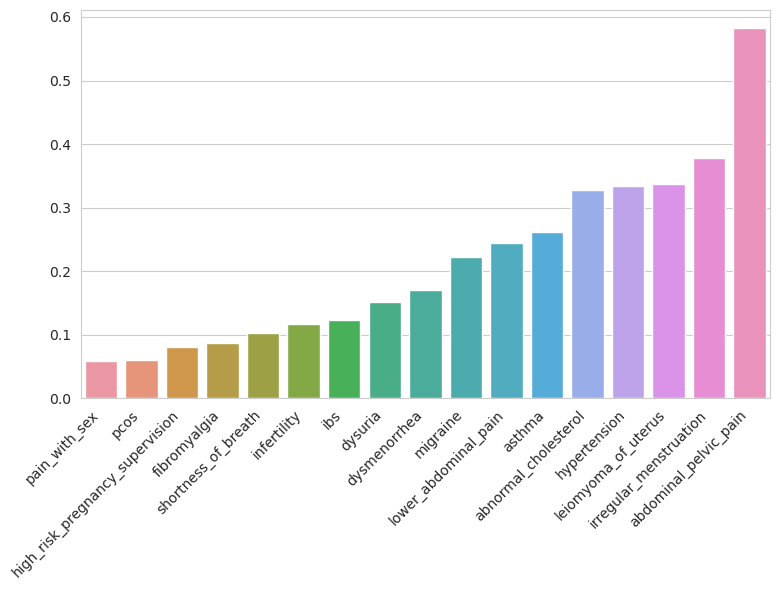

pain_with_sex                      0.058852
pcos                               0.060569
high_risk_pregnancy_supervision    0.081167
fibromyalgia                       0.087052
shortness_of_breath                0.102011
infertility                        0.116233
ibs                                0.122854
dysuria                            0.151300
dysmenorrhea                       0.170672
migraine                           0.222658
lower_abdominal_pain               0.243992
asthma                             0.261648
abnormal_cholesterol               0.327366
hypertension                       0.334723
leiomyoma_of_uterus                0.337666
irregular_menstruation             0.377881
abdominal_pelvic_pain              0.581903
dtype: float64

In [11]:
feature_prev = risk_factor_df.mean().sort_values()
plt.gcf().set_size_inches(8, 6)
sns.barplot(x=feature_prev.index, y=feature_prev.values)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('Plots/feature_prevalence.png', bbox_inches='tight')
plt.show()
feature_prev

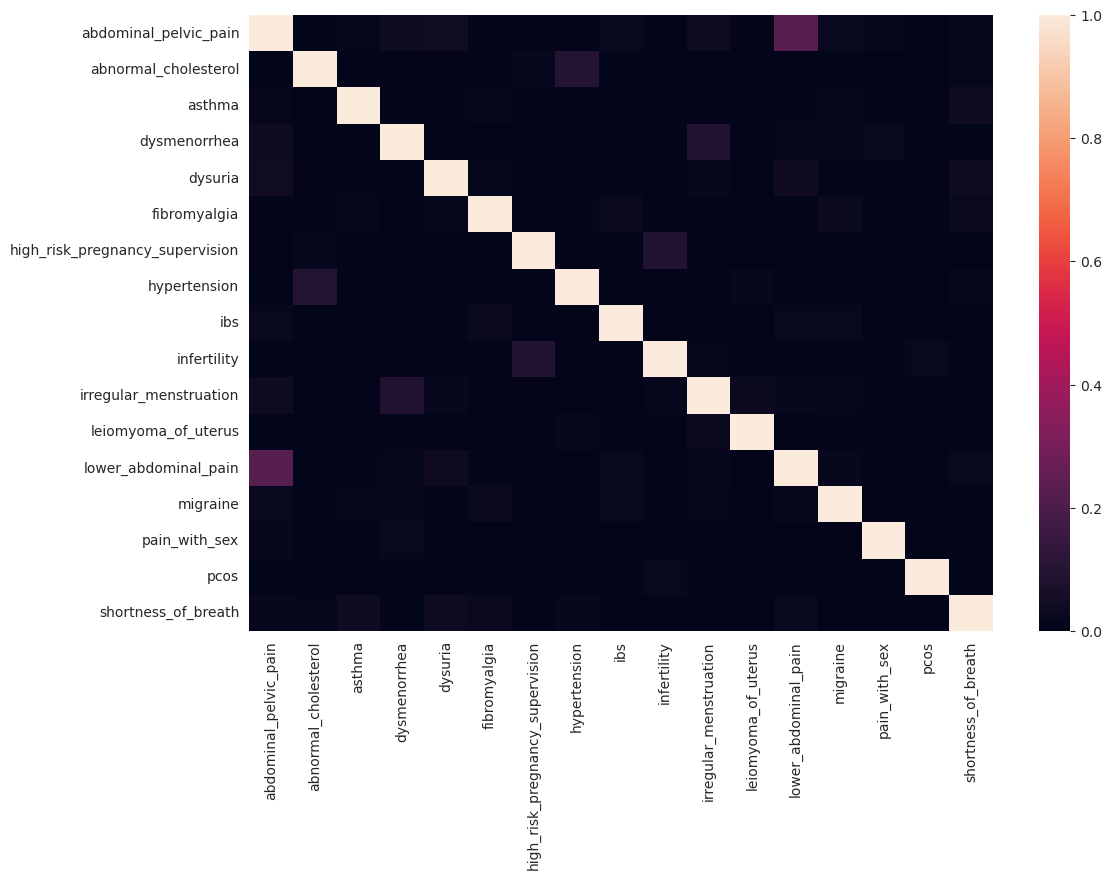

abdominal_pelvic_pain              Index([], dtype='object')
abnormal_cholesterol               Index([], dtype='object')
asthma                             Index([], dtype='object')
dysmenorrhea                       Index([], dtype='object')
dysuria                            Index([], dtype='object')
fibromyalgia                       Index([], dtype='object')
high_risk_pregnancy_supervision    Index([], dtype='object')
hypertension                       Index([], dtype='object')
ibs                                Index([], dtype='object')
infertility                        Index([], dtype='object')
irregular_menstruation             Index([], dtype='object')
leiomyoma_of_uterus                Index([], dtype='object')
lower_abdominal_pain               Index([], dtype='object')
migraine                           Index([], dtype='object')
pain_with_sex                      Index([], dtype='object')
pcos                               Index([], dtype='object')
shortness_of_breath     

In [12]:
feature_corr = risk_factor_df.corr() ** 2
plt.gcf().set_size_inches(12, 8)
sns.heatmap(feature_corr, vmin=0, vmax=1)
plt.savefig('Plots/feature_correlation.png', bbox_inches='tight')
plt.show()

feature_corr.apply(lambda x: x.index[x.between(0.3, 0.99)], axis=1)

In [13]:
risk_factor_df.index.name = 'IID'
print(risk_factor_df)
risk_factor_df.to_csv(output_data)
output_data

                   abdominal_pelvic_pain  abnormal_cholesterol  asthma  \
IID                                                                      
PMBB1001462384555                      1                     0       0   
PMBB1002857391938                      1                     0       1   
PMBB1003210639911                      0                     1       0   
PMBB1003222496744                      1                     0       1   
PMBB1003626451826                      1                     1       0   
...                                  ...                   ...     ...   
PMBB9993259322112                      1                     1       1   
PMBB9994756680249                      1                     1       1   
PMBB9995182887713                      1                     0       1   
PMBB9997370924922                      0                     1       0   
PMBB9998857962671                      0                     0       0   

                   dysmenorrhea  dysu

'Data/non_genotyped_PMBB_data_for_no_snps_clustering.csv'